# **Doctor Visit Analysis**

##*1.Import Libraries*

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

##*2.Load the dataset*

In [134]:
df = pd.read_csv('DoctorVisit.csv')
df.head(20)

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,1,female,0.19,0.55,1,4,1,yes,no,no,no,no
1,2,1,female,0.19,0.45,1,2,1,yes,no,no,no,no
2,3,1,male,0.19,0.90,3,0,0,no,no,no,no,no
3,4,1,male,0.19,0.15,1,0,0,no,no,no,no,no
4,5,1,male,0.19,0.45,2,5,1,no,no,no,yes,no
5,6,1,female,0.19,0.35,5,1,9,no,no,no,yes,no
6,7,1,female,0.19,0.55,4,0,2,no,no,no,no,no
7,8,1,female,0.19,0.15,3,0,6,no,no,no,no,no
8,9,1,female,0.19,0.65,2,0,5,yes,no,no,no,no
9,10,1,male,0.19,0.15,1,0,0,yes,no,no,no,no


In [135]:
df.tail()

,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
5185,5186,0,female,0.22,0.55,0,0,0,no,no,no,no,no
5186,5187,0,male,0.27,1.30,0,0,1,no,no,no,no,no
5187,5188,0,female,0.37,0.25,1,0,1,no,no,yes,no,no
5188,5189,0,female,0.52,0.65,0,0,0,no,no,no,no,no
5189,5190,0,male,0.72,0.25,0,0,0,no,no,yes,no,no


##*3.Understanding the dataset*

In [136]:
df.shape


(5190, 13)

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5190 entries, 0 to 5189
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5190 non-null   int64  
 1   visits      5190 non-null   int64  
 2   gender      5190 non-null   object 
 3   age         5190 non-null   float64
 4   income      5190 non-null   float64
 5   illness     5190 non-null   int64  
 6   reduced     5190 non-null   int64  
 7   health      5190 non-null   int64  
 8   private     5190 non-null   object 
 9   freepoor    5190 non-null   object 
 10  freerepat   5190 non-null   object 
 11  nchronic    5190 non-null   object 
 12  lchronic    5190 non-null   object 
dtypes: float64(2), int64(5), object(6)
memory usage: 527.2+ KB


##*4.Total number of people having the same illness*

In [138]:
df['illness'].value_counts()

illness
1    1638
0    1554
2     946
3     542
4     274
5     236
Name: count, dtype: int64

label encoding

In [139]:
#using labele encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df.select_dtypes(include=["object"]):
    df[col] = le.fit_transform(df[col])
df.head()


,Unnamed: 0,visits,gender,age,income,illness,reduced,health,private,freepoor,freerepat,nchronic,lchronic
0,1,1,0,0.19,0.55,1,4,1,1,0,0,0,0
1,2,1,0,0.19,0.45,1,2,1,1,0,0,0,0
2,3,1,1,0.19,0.90,3,0,0,0,0,0,0,0
3,4,1,1,0.19,0.15,1,0,0,0,0,0,0,0
4,5,1,1,0.19,0.45,2,5,1,0,0,0,1,0


In [140]:
df['gender'].value_counts()

gender
0    2702
1    2488
Name: count, dtype: int64

##*5.Boxplot To display income distribution of patients*

In [141]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Box(y=df['income'], marker_color='red')])
fig.update_traces(marker_line_color='red')
fig.show()


##*6. number of days reduced activity by gender because of illness*

In [142]:
df.groupby(['gender','reduced']).mean()


Unnamed: 0    visits       age    income   illness    health  \
gender reduced                                                                  
0      0        2524.038512  0.229322  0.465755  0.482735  1.462144  1.115098   
       1        1985.768421  0.400000  0.325684  0.542105  2.242105  1.610526   
       2        1622.618182  0.672727  0.391455  0.560182  2.236364  1.781818   
       3         997.311111  1.333333  0.403111  0.516000  2.733333  1.733333   
       4        1237.740741  0.851852  0.458889  0.466667  2.222222  2.074074   
       5        1169.055556  1.444444  0.401667  0.614444  2.222222  2.500000   
       6        1382.545455  1.363636  0.426364  0.622727  2.363636  1.363636   
       7        1034.846154  1.384615  0.436154  0.473462  2.653846  2.230769   
       8        1883.090909  1.090909  0.471818  0.404545  2.181818  4.000000   
       9        1349.000000  0.500000  0.570000  0.825000  3.000000  1.000000   
       10       1099.428571  2.142857  0.512857  0.421429  2.571429  2.000000   
       12       1661.000000  2.000000  0.720000  0.250000  3.500000  5.500000   
       13        906.000000  4.000000  0.720000  0.300000  4.500000  3.500000   
       14       1392.112069  1.543103  0.551724  0.427586  2.534483  4.112069   
1      0        3008.911019  0.136007  0.344703  0.694398  1.099585  0.924850   
       1        2485.158537  0.304878  0.286220  0.676341  1.743902  1.256098   
       2        2007.679245  0.471698  0.343585  0.653019  2.358491  1.547170   
       3        1909.068966  0.724138  0.334138  0.741379  2.137931  1.689655   
       4        1424.000000  0.722222  0.309444  0.869444  2.055556  2.000000   
       5        1437.272727  1.136364  0.331818  0.570455  2.272727  2.818182   
       6         562.000000  0.833333  0.340000  0.591667  2.500000  2.000000   
       7        1716.750000  0.750000  0.314167  0.655000  2.583333  4.333333   
       8         680.666667  1.333333  0.365000  0.833333  2.666667  2.000000   
       9        1375.400000  2.200000  0.310000  0.392000  2.400000  2.000000   
       10       1543.200000  1.800000  0.480000  0.590000  2.600000  4.600000   
       11        355.500000  5.000000  0.320000  1.000000  1.500000  0.500000   
       12        781.500000  2.000000  0.370000  0.515000  1.500000  1.000000   
       13        508.666667  4.000000  0.510000  0.350000  3.333333  2.333333   
       14       1236.069444  1.555556  0.476806  0.598611  2.375000  3.527778   

                 private  freepoor  freerepat  nchronic  lchronic  
gender reduced                                                     
0      0        0.472210  0.030635   0.303282  0.475711  0.098468  
       1        0.505263  0.063158   0.126316  0.568421  0.168421  
       2        0.545455  0.036364   0.200000  0.527273  0.181818  
       3        0.577778  0.066667   0.244444  0.422222  0.222222  
       4        0.555556  0.000000   0.259259  0.333333  0.222222  
       5        0.444444  0.111111   0.166667  0.555556  0.166667  
       6        0.181818  0.000000   0.454545  0.363636  0.272727  
       7        0.538462  0.000000   0.230769  0.423077  0.269231  
       8        0.181818  0.000000   0.454545  0.363636  0.454545  
       9        0.500000  0.000000   0.500000  1.000000  0.000000  
       10       0.428571  0.000000   0.428571  0.428571  0.285714  
       12       1.000000  0.000000   0.000000  0.500000  0.500000  
       13       1.000000  0.000000   0.000000  0.000000  1.000000  
       14       0.318966  0.008621   0.517241  0.448276  0.431034  
1      0        0.409405  0.054864   0.110650  0.321807  0.088981  
       1        0.524390  0.036585   0.036585  0.378049  0.097561  
       2        0.433962  0.056604   0.037736  0.301887  0.245283  
       3        0.413793  0.103448   0.068966  0.379310  0.137931  
       4        0.500000  0.000000   0.000000  0.222222  0.166667  
       5        0.500000  0.090909   0.090909  0.318182  0.181818  
       6 

##*7.Missing data Visualization using Heatmap*

<Axes: >

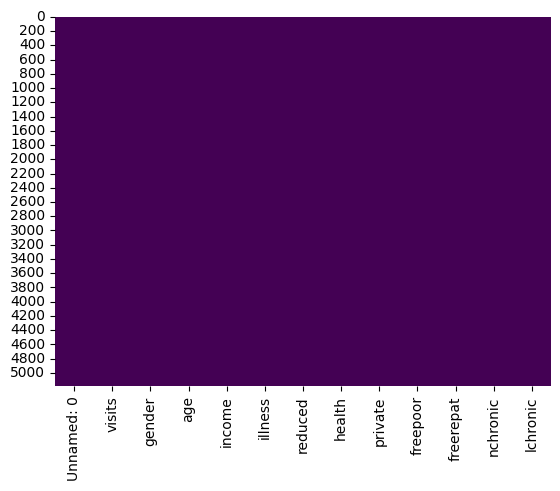

In [143]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

###8.*Correlation between variables*

<Axes: >

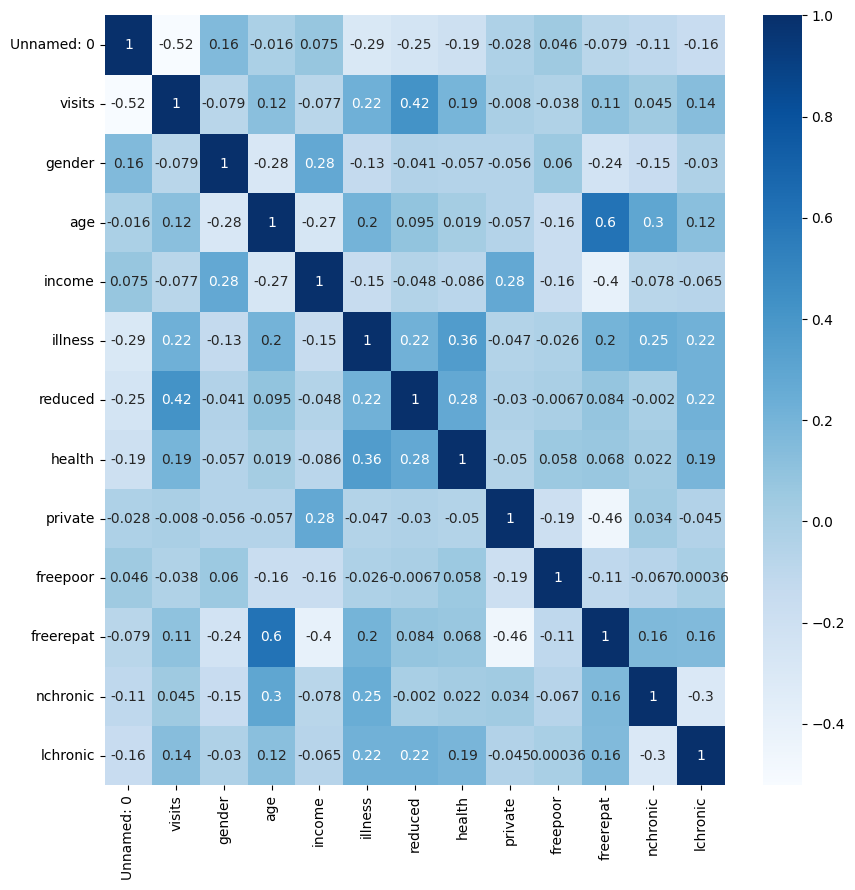

In [144]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

##*9.Relationship between income and no. of visits to doctor*

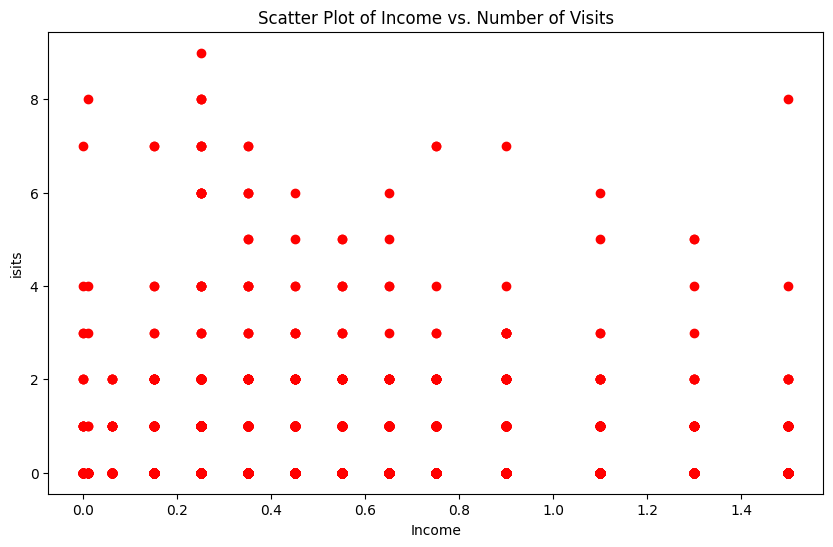

In [160]:
#scatterplot of relation between income and number of visits

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(df['income'], df['visits'], color='red')
plt.xlabel('Income')
plt.ylabel('isits')
plt.title('Scatter Plot of Income vs. Number of Visits')
plt.show()


##10. Visualization of no of peoples affectd by illness according to gender

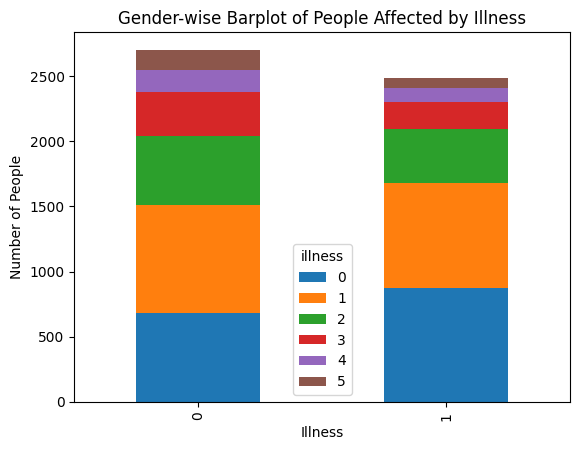

In [146]:
df_gender = df.groupby(['gender', 'illness']).size().unstack()

df_gender.plot(kind='bar', stacked=True)
plt.title('Gender-wise Barplot of People Affected by Illness')
plt.xlabel('Illness')
plt.ylabel('Number of People')
plt.show()


##11.*Visualizing the percentage of people getting government insurance due to low income,old age,also the people having private insurance*

In [147]:
# pie chart of percentage of people getting government insurance due to low income

low_income_freepoor = df[df['freepoor'] == 1].shape[0]
total_people = df.shape[0]
percentage_low_income_freepoor = (low_income_freepoor / total_people) * 100

labels = ['Government Insurance', 'Other']
values = [percentage_low_income_freepoor, 100 - percentage_low_income_freepoor]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.35)])
fig.update_traces(textinfo='percent+label', textposition='inside', rotation=-45)
fig.show()


In [148]:
# piechart of percentage of people who has private insurance

private_insurance = df[df['private'] == 1].shape[0]
total_people = df.shape[0]
percentage_private_insurance = (private_insurance / total_people) * 100

labels = ['Private Insurance', 'Other']
values = [percentage_private_insurance, 100 - percentage_private_insurance]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.35)])
fig.update_traces(textinfo='percent+label', textposition='inside', rotation=-45)
fig.show()


In [159]:
#piechart of percentage of people freerepat govrnmnt insurance

# piechart of percentage of people getting freepoor insurance due to old age
old_age_freerepat = df[df['freerepat'] == 1].shape[0]
total_people = df.shape[0]
percentage_old_age_freerepat = (old_age_freerepat / total_people) * 100

labels = ['Government Insurance due to old age or disability or vetaran satus ', 'Other']
values = [percentage_old_age_freerepat, 100 - percentage_old_age_freerepat]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.35)])
fig.update_traces(textinfo='percent+label', textposition='inside', rotation=-45)
fig.show()


##12.*Horizontal barchart to visualize reduced days of activity by gender due to illness*

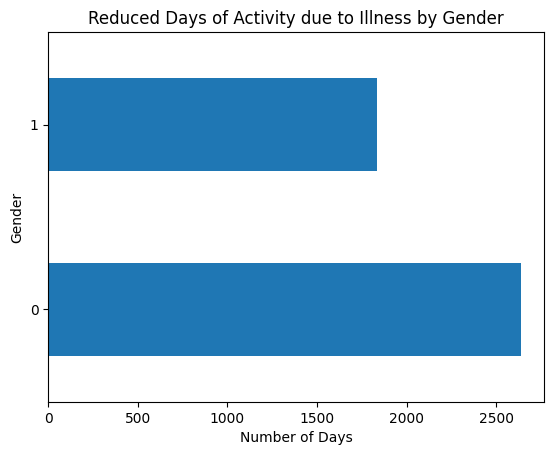

In [158]:
# count of reduced days activity due to illness based on gender

import matplotlib.pyplot as plt
df.groupby('gender')['reduced'].sum().plot(kind='barh')
plt.xlabel('Number of Days')
plt.ylabel('Gender')
plt.title('Reduced Days of Activity due to Illness by Gender')
plt.show()
